In [76]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from jre_utils.config import asset_types

from jre_utils.datapath import (
    model_built_data_paths,
    model_ready_data_paths,
    get_derived_csv_path,
    get_derived_lpa_path,
    get_derived_plps_path,
)

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [77]:
asset_type = "condo"
years_ahead = 2

metrics = {
    "weighted_mean": "unit_price_wmean",
    "weighted_median": "unit_price_wmedian",
    "mean": "unit_price_mean",
    "median": "unit_price_median",
    "weighted_mean_smoothed": "unit_price_wmean_smoothed",
    "weighted_median_smoothed": "unit_price_wmedian_smoothed",
    "mean_smoothed": "unit_price_mean_smoothed",
    "median_smoothed": "unit_price_median_smoothed",
}

dataset_paths = {
    "transactions": get_derived_csv_path(asset_type),
    "lpa": get_derived_lpa_path(),
    "plps": get_derived_plps_path()
}

granularity_columns = ["area", "area_code"]
group_by_columns = granularity_columns + ["year"]
display_columns = ["unit_price", "total_traded_area", "count"]

# metric_key_unsmoothed = "weighted_median"
metric_key_unsmoothed = "median"
metric_unsmoothed = metrics[metric_key_unsmoothed]

metric_key = f"{metric_key_unsmoothed}_smoothed"
metric = metrics[metric_key]

metric_pct_chg = metric + "_pct_chg"
upcoming_metric = "upcoming_" + metric

In [78]:
start_year = 2006
eval_start_year = 2020 # eval_years = [2020, 2021, 2022]
eval_end_year = 2022

dataset_key = "transactions"
years_ahead = 2

dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
output_dataset_name = f"{dataset_name}_{eval_start_year}"
model_built_data_path = model_built_data_paths[dataset_name]
model_ready_data_path = model_ready_data_paths[dataset_name]

df = pd.read_csv(model_built_data_path)
df = df.assign(asset_type=asset_type)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sort_values(by=["year"]).reset_index(drop=True)


In [79]:
df

,area_code,area,year,asset_type,unit_price_median_smoothed_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median_smoothed,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_smoothed_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_smoothed_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available
0,26208,Kyoto-fu Muko-shi,2005,condo,NaN,NaN,NaN,0.014112,0.027926,-0.017065,-0.002037,0.014634,0.045771,191703.575365,11.0,730.0,2485.0,2600.0,56458.0,22962.0,78562757.0,3421.424832,6289086.0,293.0,20022.0,-0.260579,-0.196721,-0.067822,0.541557,0.502249,0.473964,0.585220,0.635901,0.858880,0.559837,-0.481577,-0.578667,NaN,NaN,NaN,-0.076018,0.643132,0.129862,0.337140,-0.536044,0.864171,1,1,1,1,0
1,21213,Gifu-ken Kakamigahara-shi,2005,condo,NaN,NaN,NaN,0.038930,0.010480,-0.018612,-0.000316,0.021791,0.029644,131542.000657,8.0,510.0,5007.0,5053.0,145354.0,62591.0,211772103.0,3383.427378,19710037.0,1086.0,49836.0,-0.657092,-0.408197,-0.423008,0.979052,0.938401,1.098279,1.245881,1.258086,0.782103,1.281121,0.411766,0.420912,NaN,NaN,NaN,0.094043,0.228629,0.073531,0.507790,0.001123,0.283206,1,1,1,1,0
2,21204,Gifu-ken Tajimi-shi,2005,condo,NaN,NaN,NaN,0.095412,0.003655,-0.021041,-0.001660,0.017659,0.025226,144141.850994,4.0,310.0,3679.0,3864.0,111423.0,48729.0,163479516.0,3354.871144,13562136.0,713.0,40375.0,-0.560790,-0.840281,-0.915621,0.786577,0.762295,0.922777,1.080943,1.095688,0.723833,1.045066,0.124624,0.190142,NaN,NaN,NaN,0.481091,0.066452,-0.014920,0.374492,-0.308981,0.124081,1,1,1,1,0
3,13101,Tokyo-to Chiyoda-ku,2005,condo,NaN,NaN,NaN,0.111877,0.175917,0.114788,0.019842,0.084664,0.054835,1000000.000000,111.0,3230.0,5588.0,4622.0,48684.0,23411.0,189798304.0,8107.227543,14519864.0,2099.0,24792.0,1.478460,1.445200,1.406450,1.047618,0.879876,0.376162,0.597979,1.189350,6.790369,1.088151,0.861661,-0.344435,NaN,NaN,NaN,0.593920,4.159389,4.930761,2.507318,4.719660,1.190658,1,1,1,1,0
4,28205,Hyogo-ken Sumoto-shi,2006,condo,NaN,NaN,NaN,0.000362,0.056782,-0.049056,-0.012236,0.010467,0.111298,111666.666667,8.0,390.0,1333.0,1896.0,46012.0,19121.0,56389775.0,2949.101773,6090738.0,223.0,21305.0,-1.325178,-1.140741,-1.271381,0.159868,0.293059,0.339347,0.417701,0.407126,0.124349,0.520377,-0.891988,-0.535047,NaN,NaN,NaN,-0.046179,0.735894,-0.265537,-0.605549,-1.033547,1.355098,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,24207,Mie-ken Suzuka-shi,2022,condo,0.070062,0.160000,0.036634,0.018331,NaN,NaN,-0.002904,NaN,NaN,138751.921723,29.0,2085.0,5294.0,5858.0,194200.0,NaN,NaN,NaN,29861368.0,NaN,NaN,-1.157423,-0.524925,-0.462286,1.116842,1.175773,1.268476,NaN,NaN,NaN,1.169123,NaN,NaN,-0.109615,0.487137,-0.011590,-0.240918,NaN,NaN,0.023727,NaN,NaN,1,0,0,1,1
5107,14204,Kanagawa-ken Kamakura-shi,2022,condo,0.149048,0.149254,0.06

In [80]:
log_normalize_columns = [
    metric,
    "count",
    "total_traded_area",
    "in_migrations",
    "out_migrations",
    "population",
    "taxpayer_count",
    "taxable_income",
    "taxable_income_per_taxpayer",
    "total_tax",
    "new_dwellings",
    "existing_dwellings",
]

normalize_columns = [
    metric_pct_chg,
    "count_growth",
    "yearly_price_growth",
    "total_tax_growth",
    "taxable_income_growth",
    "taxable_income_per_taxpayer_growth",
    "net_migration_ratio",
    "new_dwellings_ratio",
    "taxpayer_count_growth",
]

maintain_columns = [
    "migrations_is_available",
    "taxable_income_is_available",
    "dwellings_is_available",
    "total_tax_is_available",
    "metric_pct_chg_is_available"
]

id_columns = ["area_code", "area", "year", "asset_type"]

feature_columns = (
    [f"{column}_log_normalized_yearly" for column in log_normalize_columns]
    + [f"{column}_normalized_yearly" for column in normalize_columns]
    + maintain_columns
)

final_columns = id_columns + normalize_columns + log_normalize_columns + feature_columns

# add ratios and growths if necessary

df = df[final_columns]

In [81]:
# for column in log_normalize_columns:
#     df[f"{column}_log"] = df[column].apply(lambda x: np.log10(1 + x))
#     df[f"{column}_log_normalized_yearly"] = df.groupby("year")[f"{column}_log"].transform(
#         lambda x: (x - x.mean()) / x.std()
#     )

# for column in normalize_columns:
#     df[f"{column}_normalized_yearly"] = df.groupby("year")[column].transform(
#         lambda x: (x - x.mean()) / x.std()
#     )

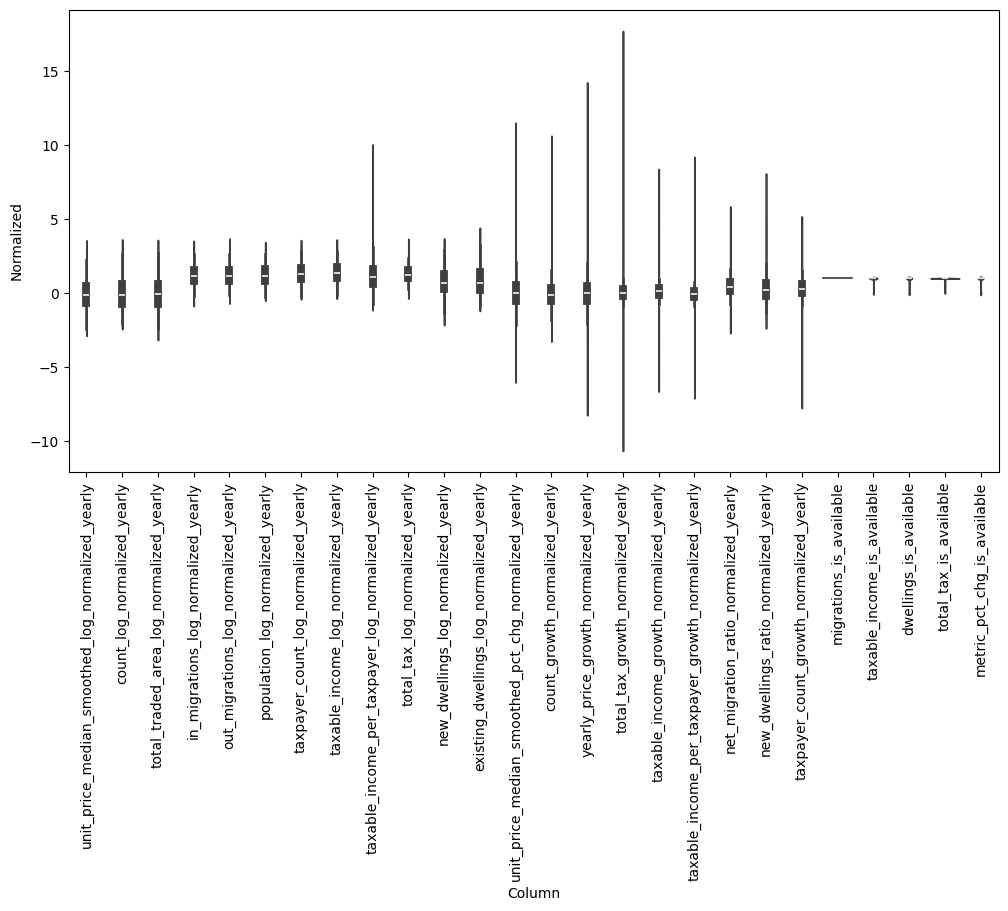

In [82]:
df_std = df[feature_columns].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df[feature_columns].keys(), rotation=90)

In [83]:
df = df[final_columns]
df[final_columns].describe()

,area_code,year,unit_price_median_smoothed_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median_smoothed,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_smoothed_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_smoothed_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available
count,5111.000000,5111.000000,4439.000000,4770.000000,4770.000000,5078.000000,4798.000000,4798.000000,5111.000000,4543.000000,4798.000000,5.111000e+03,5111.000000,5111.000000,5111.000000,5111.000000,5.111000e+03,4.798000e+03,4.798000e+03,4798.000000,5.088000e+03,4543.000000,4.543000e+03,5.111000e+03,5.111000e+03,5.111000e+03,5111.000000,5111.000000,5111.000000,4798.000000,4798.000000,4798.000000,5088.000000,4543.000000,4543.000000,4.439000e+03,4.770000e+03,4.770000e+03,5078.000000,4798.000000,4798.000000,5111.000000,4543.000000,4798.000000,5111.0,5111.000000,5111.000000,5111.000000,5111.000000
mean,19947.395422,2014.491489,0.034422,0.082175,0.015699,0.008169,0.007731,0.000185,0.000387,0.016366,0.007442,2.624998e+05,154.772452,9009.187048,12351.367247,12093.226163,2.806702e+05,1.274699e+05,4.541998e+08,3476.133216,4.540604e+07,2360.975787,1.393530e+05,2.779576e-16,-6.707824e-17,2.076645e-16,1.241783,1.238111,1.224426,1.356171,1.403400,1.263926,1.324700,0.804200,0.853338,-6.102600e-18,3.724019e-18,5.120525e-18,0.079565,0.130657,-0.048631,0.482910,0.328497,0.344627,1.0,0.938760,0.888867,0.995500,0.868519
std,10154.971618,4.618083,0.114343,0.395240,0.067213,0.039129,0.031488,0.022677,0.005111,0.006223,0.016481,1.758514e+05,351.552632,19571.514183,21145.987577,20279.820890,3.811617e+05,1.735894e+05,6.619150e+08,797.229365,7.774505e+07,3633.415767,1.941294e+05,9.983352e-01,9.983352e-01,9.983352e-01,0.591924,0.611579,0.570563,0.572373,0.562609,1.096725,0.509559,0.769932,0.920230,9.983086e-01,9.983211e-01,9.983211e-01,0.770839,0.511619,0.537131,0.577406,0.822003,0.505988,0.0,0.239794,0.314327,0.066938,0.337959
min,1100.000000,2005.000000,-0.594214,-0.812500,-0.461342,-0.466623,-0.313802,-0.192218,-0.036352,0.001265,-0.337342,6.318009e+04,3.000000,100.000000,292.000000,443.000000,1.628800e+04,7.118000e+03,2.125598e+07,2441.662747,2.089891e+06,44.000000,1.578900e+04,-2.527400e+00,-2.078430e+00,-2.820555e+00,-0.669647,-0.485729,-0.308341,-0.211530,-0.169920,-0.755111,-0.179642,-1.878069,-0.860861,-5.658716e+00,-2.903888e+00,-7.886193e+00,-10.382247,-6.466902,-6.912359,-2.505351,-2.074150,-7.589756,1.0,0.000000,0.000000,0.000000,0.000000
25%,12222.000000,2011.000000,-0.029500,-0.125000,-0.018901,-0.008423,-0.002639,-0.007882,-0.002448,0.012358,0.000492,1.600148e+05,20.000000,1335.000000,3557.500000,3655.000000,1.014605e+05,4.464925e+04,1.442945e+08,3092.540972,1.410713e+07,691.000000,4.808350e+04,-6.720915e-01,-7.445491e-01,-7.413134e-01,0.848199,0.834163,0.853395,0.972661,1.003299,0.630417,1.038620,0.255723,0.197451,-5.443849e-01,-5.271013e-01,-5.159551e-01,-0.184745,-0.097444,-0.254043,0.145258,-0.18660

In [84]:
# df = df.fillna(0) # Fill NA right before the model run
df.to_csv(model_ready_data_path, index=False)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   area_code                                             5111 non-null   int64  
 1   area                                                  5111 non-null   object 
 2   year                                                  5111 non-null   int64  
 3   asset_type                                            5111 non-null   object 
 4   unit_price_median_smoothed_pct_chg                    4439 non-null   float64
 5   count_growth                                          4770 non-null   float64
 6   yearly_price_growth                                   4770 non-null   float64
 7   total_tax_growth                                      5078 non-null   float64
 8   taxable_income_growth                                 4798

In [86]:
# Combine Dataframes for model training

combined_df = pd.DataFrame()
for asset_type in asset_types.keys():
    dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
    df = pd.read_csv(model_ready_data_paths[dataset_name])
    combined_df = pd.concat([combined_df, df], ignore_index=True)
    

In [87]:
asset_type_dummies = pd.get_dummies(combined_df["asset_type"], drop_first=True, dtype=float)
combined_df = pd.concat([combined_df, asset_type_dummies], axis=1)

In [88]:
combined_df

,area_code,area,year,asset_type,unit_price_median_smoothed_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median_smoothed,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_smoothed_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_smoothed_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available,condo,land
0,13122,Tokyo-to Katsushika-ku,2005,land,NaN,NaN,NaN,0.036121,0.019215,0.000362,0.005792,0.022765,0.018846,2.928556e+05,117.0,24565.0,22537.0,20046.0,430068.0,186672.0,6.606220e+08,3538.945139,24857572.0,4106.0,180365.0,0.548163,0.385101,0.189902,1.918659,1.843093,1.814427,1.965816,1.971915,1.091056,1.427634,1.319918,1.830850,NaN,NaN,NaN,0.074797,0.436166,0.764377,1.113695,0.074181,-0.105739,1,1,1,1,0,0.0,1.0
1,13112,Tokyo-to Setagaya-ku,2005,land,NaN,NaN,NaN,0.050517,0.043722,0.023304,0.005125,0.030353,0.019954,5.852280e+05,279.0,49695.0,61476.0,56974.0,878486.0,400592.0,2.091702e+09,5221.526069,103909106.0,11972.0,394430.0,0.975220,1.183793,0.806624,2.545491,2.528907,2.285968,2.468903,2.695080,3.765256,2.330795,2.050909,2.688561,NaN,NaN,NaN,0.173444,1.018464,1.599715,1.047498,0.643630,-0.065840,1,1,1,1,0,0.0,1.0
2,13107,Tokyo-to Sumida-ku,2005,land,NaN,NaN,NaN,0.041859,0.037135,-0.002757,0.009865,0.056570,0.040003,3.749511e+05,42.0,6340.0,13914.0,11616.0,232933.0,105527.0,3.829208e+08,3628.652165,15560727.0,5732.0,101325.0,0.700596,-0.547966,-0.995579,1.617421,1.484860,1.409607,1.590022,1.629734,1.263153,1.131867,1.547794,1.198744,NaN,NaN,NaN,0.114119,0.861957,0.650818,1.517732,2.611242,0.656373,1,1,1,1,0,0.0,1.0
3,13101,Tokyo-to Chiyoda-ku,2005,land,NaN,NaN,NaN,0.111877,0.175917,0.114788,0.019842,0.084664,0.054835,1.566651e+06,13.0,3425.0,5588.0,4622.0,48684.0,23411.0,1.897983e+08,8107.227543,14519864.0,2099.0,24792.0,1.582626,-1.585162,-1.534469,1.047618,0.879876,0.376162,0.597979,1.189350,6.790369,1.088151,0.861661,-0.344435,NaN,NaN,NaN,0.593920,4.159389,4.930761,2.507318,4.719660,1.190658,1,1,1,1,0,0.0,1.0
4,13111,Tokyo-to Ota-ku,2005,land,NaN,NaN,NaN,0.048753,0.044228,0.020891,0.006731,0.034646,0.022859,4.745463e+05,142.0,27520.0,41234.0,36568.0,693234.0,324942.0,1.386403e+09,4266.617406,60647814.0,11015.0,317934.0,0.845902,0.562714,0.289327,2.296013,2.237774,2.129615,2.331009,2.437033,2.376644,1.990815,1.993996,2.452228,NaN,NaN,NaN,0.161359,1.030470,1.511862,1.206800,0.965806,0.038827,1,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43476,24207,Mie-ken Suzuka-shi,2022,condo,0.070062,0.160000,0.036634,0.018331,NaN,NaN,-0.002904,NaN,NaN,1.387519e+05,29.0,2085.0,5294.0,5858.0,194200.0,NaN,NaN,NaN,29861368.0,NaN,NaN,-1.157423,-0.524925,-0.462286,1.116842,1.175773,1.268476,NaN,NaN,NaN,1.169123,NaN,NaN,-0.109615,0.487137,-0.011590,-0.240918,NaN,NaN,0.023727,NaN,NaN,1,0,0,1,1,1.0,0.0


In [89]:
dataset_name = f"sequence_{dataset_key}_{"all"}_{metric_key}_{years_ahead}"
combined_df.to_csv(model_ready_data_paths[dataset_name], index=False)

In [90]:
asset_type_dummies 

,condo,land
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
43476,1.0,0.0
43477,1.0,0.0
43478,1.0,0.0
43479,1.0,0.0
